In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge



from sklearn.linear_model import LassoCV, Lasso
import numpy as np
from sklearn.datasets import make_regression



from csv_reader import *
from csv_setup import *

In [3]:
bike_sharing_df = get_bike_sharing_df_clean()
bike_sharing_df.columns


print(bike_sharing_df.columns)


Index(['hr', 'holiday', 'workingday', 'weathersit', 'atemp', 'hum',
       'windspeed', 'cnt', 'no_snow', 'medium_snow', 'heavy_snow'],
      dtype='object')


done
7445     109
13512      6
6158       8
13205    175
1616      86
        ... 
10955    537
17289     51
5192     101
12172    270
235        3
Name: cnt, Length: 11643, dtype: int64


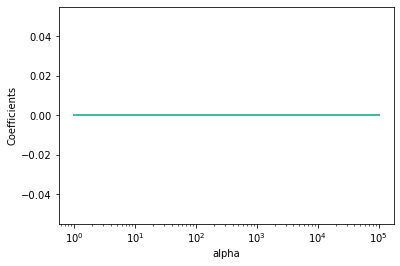

In [7]:



Y = bike_sharing_df.cnt

for i in Y:
    if i < 0:
        print(i)
        
print("done")
    
    
X = bike_sharing_df.loc[:].drop(columns=["cnt"])


X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)
print(y_train)

n_folds = 10
n_alphas = 200
alphas = np.logspace(0, 5, n_alphas) #grid search for lambda (aka 'alpha')

parameters = { 'lasso__alpha':alphas}

scaler = StandardScaler()
lasso = Lasso(normalize=True,tol=2,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, lasso)

gs = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_log_error', cv=n_folds)
gs.fit(X_train,y_train)

alphas = np.logspace(0, 5, n_alphas) #grid search for lambda (aka 'alpha')

coefs = []
# print(pipe.get_params().keys()) #reports input names can set (look for the hyper-parameters)
parameters = {'lasso__alpha':alphas}
# model = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=n_folds)
# model.fit(X_train,y_train)
for a in alphas:
    pipe.set_params(lasso__alpha=a)
    pipe.fit(X_train, y_train)
    coefs.append(pipe.named_steps['lasso'].coef_)

plt.figure()
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients');


# plt.figure()
# ax = plt.gca()
# ax.plot(alphas, coefs,'o')
# ax.set_xscale('log')
#
# plt.axis('tight')
# plt.xlabel('alpha')
# plt.ylabel('Coefficients')
# plt.title('Zoomed in')
# plt.xlim(.01,100)


In [63]:
# coefficients {𝛽1,…,𝛽𝑝} for the last fitted model in the above for loop
pipe.named_steps['lasso'].coef_

array([ 0., -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.])

In [64]:
# B0
pipe.named_steps['lasso'].intercept_

188.19144550373616

In [65]:
# Average of Y's
np.mean(y_train)

188.19144550373616

In [66]:
# Best alpha
best_alpha = gs.best_params_['lasso__alpha']
print(best_alpha)

1.0


In [67]:
scaler = StandardScaler()
lasso = Lasso(alpha=best_alpha,normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, lasso)
pipe.fit(X_train, y_train)

best_coef_lasso = pipe.named_steps['lasso'].coef_

# print('The final set of coefficients: ')
print(best_coef_lasso)

[ 51.50057924  -3.53397397   0.86020109  -0.          53.03101212
 -42.10661726   0.9289991    3.83850382  -0.         -11.56141201]


In [68]:
print('\nCoefficients  [lasso]')
for i in range(0,10):
    print('   Feature %2i:  %.2f'%(i,\
                    best_coef_lasso[i]))


Coefficients  [lasso]
   Feature  0:  51.50
   Feature  1:  -3.53
   Feature  2:  0.86
   Feature  3:  -0.00
   Feature  4:  53.03
   Feature  5:  -42.11
   Feature  6:  0.93
   Feature  7:  3.84
   Feature  8:  -0.00
   Feature  9:  -11.56


In [69]:
np.count_nonzero(best_coef_lasso)

8

In [61]:

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
y_pred = pipe.predict(x_test)

scaled_y_pred = NormalizeData(y_pred)
scaled_y_test = NormalizeData(y_test)  

rmsle_test_using_ridge = mean_squared_log_error(scaled_y_test,scaled_y_pred)
# print(mse_test_using_coef_true)
print('\nTest set RMSLE using ridge coefficients: %.2f'%rmsle_test_using_ridge)
mse_test_using_ridge = mean_squared_error(scaled_y_test,scaled_y_pred)
# print(mse_test_using_coef_true)
print('\nTest set MSE using ridge coefficients: %.2f'%mse_test_using_ridge)


ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [59]:

lm = pipe



y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(x_test)

print('Train Score: ')
print(r2_score(y_train, y_train_pred))

print('\nTest Score: ')
print(r2_score(y_test, y_test_pred))

Train Score: 
0.32989796838281615

Test Score: 
0.3309850178185305


In [60]:
import statsmodels.api as smf
model1=smf.OLS(y_train,X_train)
result = model1.fit()
result.summary()
y_pred = result.predict(x_test)

from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle)

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.